In [1]:
import os
os.system('clear')

import numpy as np
import pandas as pd
from datetime import datetime

from termcolor import colored
from SecretColors.palette import Palette
material = Palette("material", color_mode = 'hexa')

hex_salmon = '#F68F83'
hex_gold = '#BC9661'
hex_indigo = '#2D2E5F'
hex_maroon = '#8C4750'
hex_white = '#FAFAFA'
hex_blue = '#7EB5D2'

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.dates import DateFormatter
import matplotlib.dates as dates
mpl.rcParams['font.family'] = 'SF Compact Text'
mpl.rcParams['font.weight'] = 'medium'
mpl.rcParams['axes.titleweight'] = 'semibold'
mpl.rcParams['axes.labelweight'] = 'medium'
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=[hex_indigo, hex_salmon, hex_maroon])
mpl.rcParams["figure.titlesize"] = 'large'
mpl.rcParams["figure.titleweight"] = 'semibold'

print('')
print(colored('...','white'))
print('')
print(colored(f'Finished successfully', 'green'))
print('')
print(colored('...','white'))
print('')


...

Finished successfully

...



In [2]:
# # RAW (ID)

# flist = [f for f in sorted(os.listdir("./raw")) if not (f.startswith('.') or f.startswith('~'))]

# print('')
# print(colored('...','white'))
# print('')
# print(colored(f'Files in directory: {flist}', 'blue'))
# print('')

# years = ['2018','2019']

# for filename in flist:
#     y = filename[:4]
#     if y in years:

#         print(colored('...','white'))
#         print('')
#         print(colored(f'Currently processing file: {filename}', 'blue'))
#         print(colored(f'Currently processing year: {y}', 'blue'))
#         print('')
        
#         df = pd.read_excel(f"./raw/{filename}", header = None, skip_blank_lines=True, decimal=',', thousands='.')
#         df = df.replace('Instrument code', 'Instrumentcode')
#         df = df.replace('Contract type', 'Contracttype')
#         df = df.dropna(how = 'all', axis = 0)
#         df = df.dropna(how = 'all', axis = 1)
#         df = df.reset_index(drop = True)
        
#         df.columns = df.iloc[0]
#         df = df.drop(0)

#         df = df[~df['Instrumentcode'].str.contains('1H-25')]

#         df1 = df[~df['Instrumentcode'].str.contains('NL ID ')]
#         df2 = df[df['Instrumentcode'].str.contains('NL ID ')]

#         df1['Date'] = pd.to_datetime(df1['Instrumentcode'].str[:7], format = '%d%b%y')
#         df2['Date'] = pd.to_datetime(df2['Instrumentcode'].str.replace("NL ID ", "").str[:7], format = '%y%b%d')
#         df = pd.concat([df1, df2]).sort_index()

#         df = df[df['Date'].dt.year == int(y)]

#         df['Time'] = (df['Instrumentcode'].str[-2:].astype('int64') - 1).astype('str')
#         df['Date'] = pd.to_datetime(df['Date'].dt.strftime("%Y-%m-%d") + ' ' + df['Time'].astype(str) + ':00:00')

#         df['Price'] = df['Price'].astype('float')
#         df['Volume'] = df['Volume'].astype('float')

#         df.to_pickle(f"./{os.path.splitext(filename)[0]}.pkl")

# print(colored('...','white'))
# print('')
# print(colored(f'Finished successfully', 'green'))
# print('')
# print(colored('...','white'))
# print('')

In [3]:
# flist = [f for f in sorted(os.listdir("./close")) if not (f.startswith('.') or f.startswith('~'))]

# print(flist)
# big_df = pd.DataFrame()

# for filename in flist:
#     print(filename)
#     df = pd.read_excel(f"./close/{filename}", skip_blank_lines=True, decimal=',', thousands='.')
#     # df = df.replace('Instrument code', 'Instrumentcode')
#     # df = df.replace('Contract type', 'Contracttype')
#     df['period_from'] = df['period_from'].astype('str')
#     df['period_until'] = df['period_until'].astype('str')
#     df['period_from'] = df['period_from'].str[-8:]
#     df['period_until'] = df['period_until'].str[-8:]
#     df = df.dropna(how = 'all', axis = 0)
#     df = df.dropna(how = 'all', axis = 1)
#     df = df.reset_index(drop = True)
#     df['Time'] = df['period_from'].str[0:2]
#     df['Date'] = pd.to_datetime(df['datum'].dt.strftime("%Y-%m-%d") + ' ' + df['Time'] + ':00:00')
#     print(df)
#     df_group3 = df.drop([], axis=1).groupby([(df['Date'].dt.year), (df['Date'].dt.month), (df['Date'].dt.day), (df['Date'].dt.hour)]).mean()
#     df_group3['Date'] = df_group3.index
#     df_group3['Date'] = pd.to_datetime(df_group3['Date'], format='(%Y, %m, %d, %H)')
#     df_group3 = df_group3.set_index(pd.DatetimeIndex(df_group3['Date']))
#     print(df_group3)

#     big_df['Imbalance'] = df_group3['take_from_system_EUR_MWh']
#     print(big_df)

In [4]:
# DAY AHEAD (DA)

flist = [f for f in sorted(os.listdir("./rawDA")) if not (f.startswith('.') or f.startswith('~'))]

print('')
print(colored('...','white'))
print('')
print(colored(f'Files in directory: {flist}', 'blue'))
print('')

big_df = pd.DataFrame()
date = []
mcp = []

for filename in flist:
    
    print(colored('...','white'))
    print('')
    print(colored(f'Currently processing file: {filename}', 'blue'))
    print('')

    df_da = pd.read_excel(f"./rawDA/{filename}", sheet_name="prices_2", skip_blank_lines=True, decimal=',', thousands='.')
    for index, row in df_da.iterrows():
        for t in range(1, 25):
            t2 = t - 1
            if t <= 9:
                t = f'0{t}'
            # df2['Date'] = pd.to_datetime(df2['Date'])
            # print(type(row['PRICES'].strftime("%Y-%m-%d") + ' ' + f'{t}' + ':00:00'))
            # df2 = df2.append(row['PRICES'].strftime("%Y-%m-%d") + ' ' + f'{t}' + ':00:00', row[f'Hour {t}']) 
            date.append(row['PRICES'].strftime("%Y-%m-%d") + ' ' + f'{t2}' + ':00:00')
            mcp.append(row[f'Hour {t}'])
            # df2['MCP'] = df2['MCP'].append(row[f'Hour {t}'])
            # pd.to_datetime(df_group3['Date'], format='(%Y, %m, %d, %H)')
            
            # df2['Date2'] = pd.to_datetime(df2['Date'], format='%Y-%m-%d %H')

            # pd.to_datetime(df_group3['Date'], format='(%Y, %m, %d, %H)')
            
            # df2['Date'] = pd.to_datetime(df2, format='(%Y, %m, %d, %H)')
    
    df_da2 = pd.DataFrame(date)
    df_da2.columns = ['Date']
    df_da2['MCP'] = pd.DataFrame(mcp)
    df_da2 = df_da2.set_index(pd.DatetimeIndex(df_da2['Date']))
    df_da2 = df_da2.drop(['Date'], axis=1)

print(colored('...','white'))
print('')
print(colored(f'(DA) Grouped by hour', 'blue'))
print('')

print(colored('...','white'))
print('')
print(df_da2)
print('')

print(colored('...','white'))
print('')
print(colored(f'Finished successfully', 'green'))
print('')
print(colored('...','white'))
print('')


...

Files in directory: ['DAM - Historical data - 2018.xls', 'DAM - Historical data - 2019.xls']

...

Currently processing file: DAM - Historical data - 2018.xls

...

Currently processing file: DAM - Historical data - 2019.xls

...

(DA) Grouped by hour

...

                       MCP
Date                      
2018-01-01 00:00:00  27.20
2018-01-01 01:00:00  27.30
2018-01-01 02:00:00  30.10
2018-01-01 03:00:00  20.87
2018-01-01 04:00:00  25.56
...                    ...
2019-12-31 19:00:00  46.00
2019-12-31 20:00:00  42.20
2019-12-31 21:00:00  39.74
2019-12-31 22:00:00  38.88
2019-12-31 23:00:00  37.21

[17520 rows x 1 columns]

...

Finished successfully

...



In [5]:
# # INTRADAY

# # df = df.replace('Instrument code', 'Instrumentcode')
# # df = df.replace('Contract type', 'Contracttype')
# df['period_from'] = df['period_from'].astype('str')
# df['period_until'] = df['period_until'].astype('str')
# df['period_from'] = df['period_from'].str[-8:]
# df['period_until'] = df['period_until'].str[-8:]
# df = df.dropna(how = 'all', axis = 0)
# df = df.dropna(how = 'all', axis = 1)
# df = df.reset_index(drop = True)
# df['Time'] = df['period_from'].str[0:2]
# df['Date'] = pd.to_datetime(df['Date'].dt.strftime("%Y-%m-%d") + ' ' + df['Time'] + ':00:00')
# print(df)
# df_group3 = df.drop([], axis=1).groupby([(df['Date'].dt.year), (df['Date'].dt.month), (df['Date'].dt.day), (df['Date'].dt.hour)]).mean()
# df_group3['Date'] = df_group3.index
# df_group3['Date'] = pd.to_datetime(df_group3['Date'], format='(%Y, %m, %d, %H)')
# df_group3 = df_group3.set_index(pd.DatetimeIndex(df_group3['Date']))
# print(df_group3)

# big_df['Imbalance'] = df_group3['take_from_system_EUR_MWh']
# print(big_df)

0              Instrumentcode  Side  Price  Volume Contracttype  \
1       NL ID 18JAN01 - 1H-12   buy  29.95   159.0         Spot   
2       NL ID 18JAN01 - 1H-12  sell  29.95   159.0  CrossBorder   
3       NL ID 18JAN01 - 1H-13   buy  29.95    73.0         Spot   
4       NL ID 18JAN01 - 1H-13  sell  29.95    73.0  CrossBorder   
5       NL ID 18JAN01 - 1H-14   buy  34.95    13.0         Spot   
...                       ...   ...    ...     ...          ...   
817032  NL ID 18DEC31 - 1H-24  sell  40.00     0.3         Spot   
817033  NL ID 18DEC31 - 1H-23   buy  50.00     0.3         Spot   
817034  NL ID 18DEC31 - 1H-23  sell  50.00     0.3         Spot   
817035  NL ID 18DEC31 - 1H-24   buy  49.00    20.0         Spot   
817036  NL ID 18DEC31 - 1H-24  sell  49.00    20.0         Spot   

0      Creation timestamp (GMT)                Date Time  
1           2017-12-31 20:00:00 2018-01-01 11:00:00   11  
2           2017-12-31 20:00:00 2018-01-01 11:00:00   11  
3           2017-1

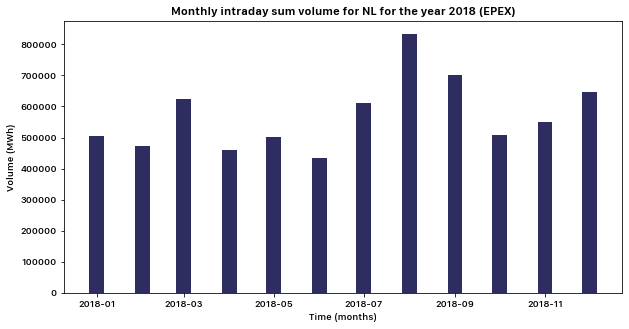

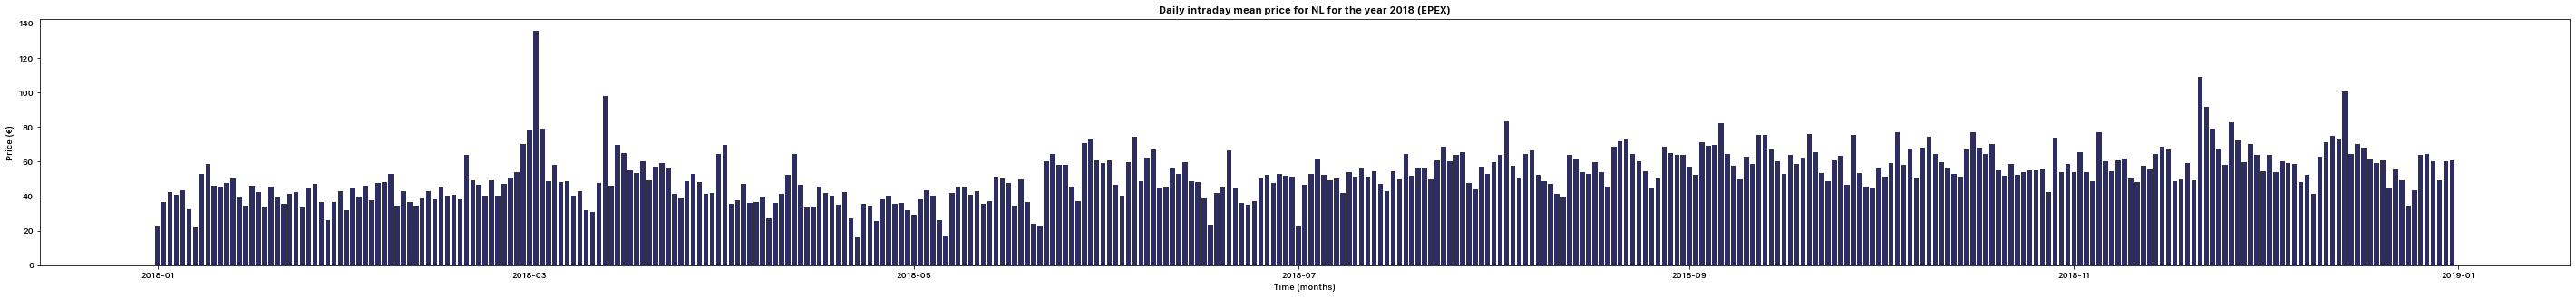

0               Instrumentcode  Side  Price  Volume Contracttype  \
1        NL ID 19JAN01 - 1H-01   buy  78.00    10.0         Spot   
2        NL ID 19JAN01 - 1H-01  sell  78.00    10.0         Spot   
3        NL ID 19JAN01 - 1H-01   buy  60.00     2.0         Spot   
4        NL ID 19JAN01 - 1H-01  sell  60.00     2.0         Spot   
5        NL ID 19JAN01 - 1H-01   buy  78.00    25.0         Spot   
...                        ...   ...    ...     ...          ...   
1041550  NL ID 19JUL09 - 1H-22   buy  44.99     4.4  CrossBorder   
1041551  NL ID 19JUL10 - 1H-09   buy  51.00   100.4         Spot   
1041552  NL ID 19JUL10 - 1H-09  sell  51.00   100.4  CrossBorder   
1041553  NL ID 19JUL10 - 1H-08   buy  52.00     5.0         Spot   
1041554  NL ID 19JUL10 - 1H-08  sell  52.00     5.0  CrossBorder   

0       Creation timestamp (GMT)                Date Time  
1            31-12-2018 16:47:42 2019-01-01 00:00:00    0  
2            31-12-2018 16:47:42 2019-01-01 00:00:00    0  
3  

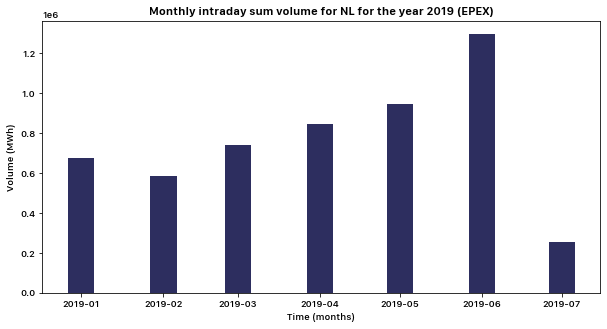

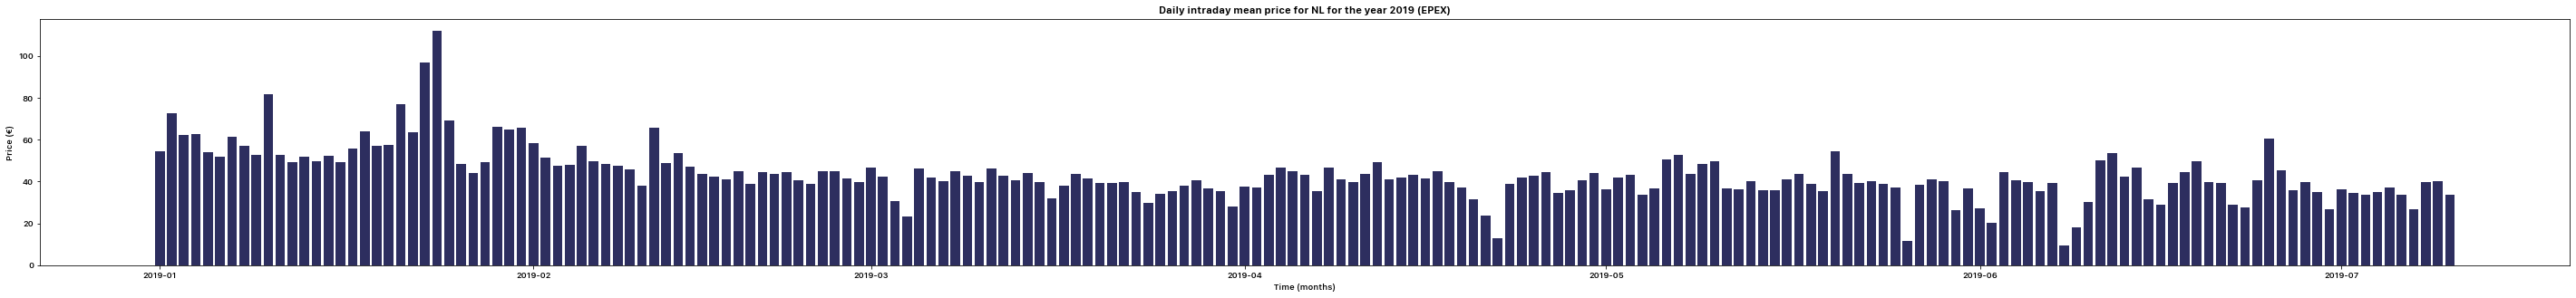


...

Period: 2018–2019

Price: 90445300 Euro
Volume: 12179673 MWh

...

Finished successfully

...



In [6]:
# INTRADAY (ID)

# years = ['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']
years = ['2018','2019']
country = 'NL'

dfo = pd.DataFrame()
dfo_group = pd.DataFrame()
dfo_group2 = pd.DataFrame()
dfo_group3 = pd.DataFrame()

price = []
volume = []
breaks = []

for y in years:
    i = years.index(y)

    df = pd.read_pickle(f"./{y}_Intraday.pkl")
    print(df)

    # df['Price'] = df['Price'].astype('float')
    # df['Volume'] = df['Volume'].astype('float')
    # print(df['Price'])
    # print(df['Volume'])

    df['Creation timestamp (GMT)'] = pd.to_datetime(df['Creation timestamp (GMT)'], format='%d-%m-%Y %H:%M:%S')

    volume_buy = df.loc[df['Contracttype'] == 'Spot'].loc[df['Side'] == 'buy', 'Volume'].sum()
    volume_sell = df.loc[df['Contracttype'] == 'Spot'].loc[df['Side'] == 'sell', 'Volume'].sum()

    price_buy = df.loc[df['Contracttype'] == 'Spot'].loc[df['Side'] == 'buy', 'Price'].sum()
    price_sell = df.loc[df['Contracttype'] == 'Spot'].loc[df['Side'] == 'sell', 'Price'].sum()

    df_group = df.drop(['Instrumentcode', 'Contracttype', 'Side'], axis=1).groupby([(df['Date'].dt.year),(df['Date'].dt.month)]).sum()
    df_group['Date'] = df_group.index
    df_group['Date'] = pd.to_datetime(df_group['Date'], format='(%Y, %m)')

    df_group2 = df.drop(['Instrumentcode', 'Contracttype', 'Side'], axis=1).groupby([(df['Date'].dt.year), (df['Date'].dt.month), (df['Date'].dt.day)]).mean()
    df_group2['Date'] = df_group2.index
    df_group2['Date'] = pd.to_datetime(df_group2['Date'], format='(%Y, %m, %d)')

    df_group3 = df.drop(['Instrumentcode', 'Contracttype', 'Side'], axis=1).groupby([(df['Date'].dt.year), (df['Date'].dt.month), (df['Date'].dt.day), (df['Date'].dt.hour)]).mean()
    df_group3['Date'] = df_group3.index
    df_group3['Date'] = pd.to_datetime(df_group3['Date'], format='(%Y, %m, %d, %H)')

    df_group = df_group.set_index(pd.DatetimeIndex(df_group['Date']))
    df_group2 = df_group2.set_index(pd.DatetimeIndex(df_group2['Date']))
    df_group3 = df_group3.set_index(pd.DatetimeIndex(df_group3['Date']))

    dfo = dfo.append(df, ignore_index = False)
    dfo_group = dfo_group.append(df_group, ignore_index = False)
    dfo_group2 = dfo_group2.append(df_group2, ignore_index = False)
    dfo_group3 = dfo_group3.append(df_group3, ignore_index = False)
    # dfo2 = dfo2.append(df, ignore_index = False)
    # breaks.append(len(dfo))

    price.append(df['Price'].sum())
    volume.append(df['Volume'].sum())
    
    print('')
    print(colored('...','white'))
    print('')
    print(colored(f'Year: {y}', 'blue'))
    print('')
    print(colored(f'Price: {int(round(price[i]))} Euro', 'blue'))
    print(colored(f'Volume: {int(round(volume[i]))} MWh', 'blue'))
    print('')
    print(colored('...','white'))
    print('')

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.bar(df_group['Date'], df_group['Volume'], width=10)
    ax.set_title(f'Monthly intraday sum volume for {country} for the year {y} (EPEX)')
    ax.set_xlabel(r'Time (months)')
    ax.set_ylabel(r'Volume (MWh)')
    plt.show()

    fig, ax = plt.subplots(figsize=(50, 5))
    ax.bar(df_group2['Date'], df_group2['Price'])
    ax.set_title(f'Daily intraday mean price for {country} for the year {y} (EPEX)')
    ax.set_xlabel(r'Time (months)')
    ax.set_ylabel(r'Price (€)')
    plt.show()

print('')
print(colored('...','white'))
print('')
print(colored(f'Period: {years[0]}–{years[-1]}', 'blue'))
print('')
print(colored(f'Price: {int(round(sum(price)))} Euro', 'blue'))
print(colored(f'Volume: {int(round(sum(volume)))} MWh', 'blue'))
print('')

dfo['Time to delivery'] = dfo['Date'] - dfo['Creation timestamp (GMT)']
dfo['Time to delivery'] = dfo['Time to delivery'] / np.timedelta64(1, 'h')
# df['Time to delivery'] = (df['Date'] - df['Creation timestamp (GMT)']).astype('timedelta64[h]')

print(colored('...','white'))
print('')
print(colored(f'Finished successfully', 'green'))
print('')
print(colored('...','white'))
print('')

In [7]:
print('')
print(colored('...','white'))
print('')
print(colored(f'(ID) Grouped by month', 'blue'))
print('')
print(colored('...','white'))
print('')

print(dfo_group)

print('')
print(colored('...','white'))
print('')
print(colored(f'(ID) Grouped by day', 'blue'))
print('')
print(colored('...','white'))
print('')

print(dfo_group2)

print('')
print(colored('...','white'))
print('')
print(colored(f'(ID) Grouped by hour', 'blue'))
print('')
print(colored('...','white'))
print('')


...

(ID) Grouped by month

...

0                Price     Volume       Date
Date                                        
2018-01-01  1728361.20   505324.2 2018-01-01
2018-02-01  1756316.20   472567.6 2018-02-01
2018-03-01  2733405.80   623136.0 2018-03-01
2018-04-01  1629797.40   460410.6 2018-04-01
2018-05-01  1758076.20   500363.0 2018-05-01
2018-06-01  2305603.10   433854.6 2018-06-01
2018-07-01  4298024.18   611712.4 2018-07-01
2018-08-01  6480592.44   833493.2 2018-08-01
2018-09-01  6050313.06   699935.0 2018-09-01
2018-10-01  4903853.72   506918.8 2018-10-01
2018-11-01  5490469.24   548385.0 2018-11-01
2018-12-01  6790717.34   646543.8 2018-12-01
2019-01-01  7619236.34   673769.2 2019-01-01
2019-02-01  5435577.56   585128.2 2019-02-01
2019-03-01  5002974.80   738846.4 2019-03-01
2019-04-01  6893484.28   843724.4 2019-04-01
2019-05-01  8226174.00   946047.2 2019-05-01
2019-06-01  9298319.02  1294856.4 2019-06-01
2019-07-01  2044004.46   254656.8 2019-07-01

...

(ID) Grouped by

In [8]:
OG = df_group3.merge(df_da2['MCP'], how='outer', left_index=True, right_index=True)

OG['Absolute'] = np.subtract(OG['Price'], OG['MCP'])
OG['Percentual'] = 100 * np.divide(np.subtract(OG['Price'], OG['MCP']), OG['MCP'])

print('')
print(colored('...','white'))
print('')
print(colored(f'(DA & ID) Grouped by hour', 'blue'))
print('')
print(colored('...','white'))
print('')

print(OG)


...

(DA & ID) Grouped by hour

...

                     Price  Volume Date    MCP  Absolute  Percentual
Date                                                                
2018-01-01 00:00:00    NaN     NaN  NaT  27.20       NaN         NaN
2018-01-01 01:00:00    NaN     NaN  NaT  27.30       NaN         NaN
2018-01-01 02:00:00    NaN     NaN  NaT  30.10       NaN         NaN
2018-01-01 03:00:00    NaN     NaN  NaT  20.87       NaN         NaN
2018-01-01 04:00:00    NaN     NaN  NaT  25.56       NaN         NaN
...                    ...     ...  ...    ...       ...         ...
2019-12-31 19:00:00    NaN     NaN  NaT  46.00       NaN         NaN
2019-12-31 20:00:00    NaN     NaN  NaT  42.20       NaN         NaN
2019-12-31 21:00:00    NaN     NaN  NaT  39.74       NaN         NaN
2019-12-31 22:00:00    NaN     NaN  NaT  38.88       NaN         NaN
2019-12-31 23:00:00    NaN     NaN  NaT  37.21       NaN         NaN

[17520 rows x 6 columns]


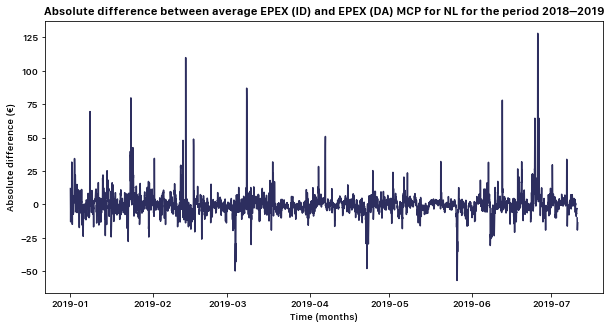

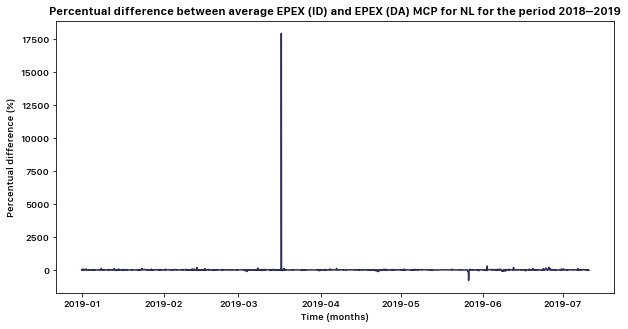

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(OG.index, OG.Absolute)
ax.set_title(f'Absolute difference between average EPEX (ID) and EPEX (DA) MCP for {country} for the period {years[0]}–{years[-1]}')
ax.set_xlabel(r'Time (months)')
ax.set_ylabel(r'Absolute difference (€)');

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(OG.index, OG.Percentual)
ax.set_title(f'Percentual difference between average EPEX (ID) and EPEX (DA) MCP for {country} for the period {years[0]}–{years[-1]}')
ax.set_xlabel(r'Time (months)')
ax.set_ylabel(r'Percentual difference (%)');

Text(0, 0.5, 'Volume (MWh)')

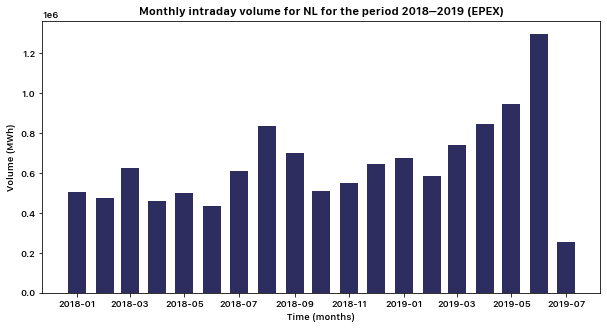

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(dfo_group['Date'], dfo_group['Volume'], width=20)
ax.set_title(f'Monthly intraday volume for {country} for the period {years[0]}–{years[-1]} (EPEX)')
ax.set_xlabel(r'Time (months)')
ax.set_ylabel(r'Volume (MWh)')

0              Instrumentcode  Side  Price  Volume Contracttype  \
383385  NL ID 19APR03 - 1H-16   buy   41.0     0.1         Spot   
383386  NL ID 19APR03 - 1H-16  sell   41.0     0.1  CrossBorder   
383425  NL ID 19APR03 - 1H-16   buy   41.0     9.9         Spot   
383426  NL ID 19APR03 - 1H-16  sell   41.0     9.9         Spot   
383427  NL ID 19APR03 - 1H-16  sell   41.0     5.0         Spot   
...                       ...   ...    ...     ...          ...   
385252  NL ID 19APR03 - 1H-16   buy   44.0     5.0  CrossBorder   
385253  NL ID 19APR03 - 1H-16  sell   44.0     1.7         Spot   
385254  NL ID 19APR03 - 1H-16   buy   44.0     1.7  CrossBorder   
385399  NL ID 19APR03 - 1H-16   buy   40.0    10.0         Spot   
385400  NL ID 19APR03 - 1H-16  sell   40.0    10.0         Spot   

0      Creation timestamp (GMT)                Date Time  Time to delivery  \
383385      2019-04-03 07:10:33 2019-04-03 15:00:00   15          7.824167   
383386      2019-04-03 07:10:33 2019-04

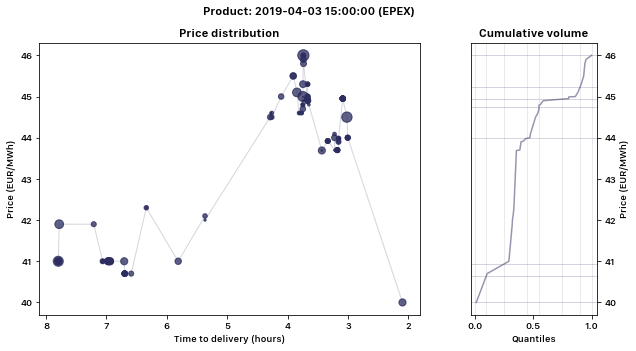

In [11]:
datetime_of_interest = '2019-04-03 15:00:00'
filtered_dates = pd.DataFrame()
filtered_dates = dfo.loc[dfo["Date"] == datetime_of_interest]

filtered_dates['Volume_weighted'] = filtered_dates['Price'] * filtered_dates['Volume']
filtered_dates['Cumulative volume'] = ''
filtered_dates['Relative volume'] = ''

volume_tot = filtered_dates['Volume'].sum()

df = filtered_dates
for idx, row in df.iterrows():
    df['Cumulative volume'][idx] = df.loc[df['Price'] <= df['Price'][idx]]['Volume'].sum()
    df['Relative volume'][idx] = df['Cumulative volume'][idx] / volume_tot

# quantiles = [0, 10, 25, 45, 55, 75, 90, 100]
# quantiles_val = list()
# quantiles_idx = list()
# for q in quantiles:
#     quantiles_val.append(filtered_dates['Price'].quantile(q/100))
#     quantiles_idx.append(f'Q{q}')

df = filtered_dates
quantiles = [0, 0.1, 0.25, 0.45, 0.55, 0.75, 0.9, 1.0]
quantiles_val = list()
quantiles_idx = list()

for q in quantiles:
    
    if q == 0:
        quantiles_val.append(df.sort_values('Relative volume', ascending=True).iloc[0]['Price'])
        continue

    if q == 1.0:
        quantiles_val.append(df.sort_values('Relative volume', ascending=False).iloc[0]['Price'])
        continue

    x1 = df.loc[df['Relative volume'] <= q].sort_values('Relative volume', ascending=False).iloc[0]['Relative volume']
    y1 = df.loc[df['Relative volume'] <= q].sort_values('Relative volume', ascending=False).iloc[0]['Price']
    x2 = df.loc[df['Relative volume'] >= q].sort_values('Relative volume', ascending=True).iloc[0]['Relative volume']
    y2 = df.loc[df['Relative volume'] >= q].sort_values('Relative volume', ascending=True).iloc[0]['Price']

    if y2 == y1:
        quantiles_val.append(y2)
    else:
        delta = (y2 - y1) / (x2 - x1)
        quantiles_val.append(y1 + (q - x1) * delta)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'width_ratios': [3, 1]})
plt.suptitle(f'Product: {datetime_of_interest} (EPEX)')

x = filtered_dates['Time to delivery']
y = filtered_dates['Price']
ax1.scatter(x, y, s=filtered_dates['Volume'].apply(lambda x: x*5), alpha=0.5)
ax1.plot(x, y, linewidth=1, alpha=0.2)
ax1.set_xlim(x.min() - 0.05 * (x.max() - x.min()), x.max() + 0.05 * (x.max() - x.min()))
ax1.set_ylim(y.min() - 0.05 * (y.max() - y.min()), y.max() + 0.05 * (y.max() - y.min()))
ax1.set_title(f'Price distribution')
ax1.set_xlabel(r'Time to delivery (hours)')
ax1.set_ylabel(r'Price (EUR/MWh)')
ax1.invert_xaxis()

x = filtered_dates.sort_values('Price')['Relative volume']
y = filtered_dates.sort_values('Price')['Price']
[ax2.axhline(q, linewidth=1, alpha=0.2) for q in quantiles_val]
[ax2.axvline(q, linewidth=1, alpha=0.1) for q in quantiles]
ax2.plot(x, y, alpha=0.5)
ax2.set_xlim(x.min() - 0.05 * (x.max() - x.min()), x.max() + 0.05 * (x.max() - x.min()))
ax2.set_ylim(y.min() - 0.05 * (y.max() - y.min()), y.max() + 0.05 * (y.max() - y.min()))
ax2.set_title(f'Cumulative volume')
ax2.set_xlabel(r'Quantiles')
ax2.set_ylabel(r'Price (EUR/MWh)')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")

print(filtered_dates)

In [12]:
# quantiles_val = list()
# quantiles_idx = list()

# for t in range(9,8,-1):
    
#     print(t)
    
#     df = filtered_dates.loc[(filtered_dates['Time to delivery'] <= t) & (filtered_dates['Time to delivery'] > t - 1)]
#     df['Volume_weighted'] = df['Price'] * df['Volume']
#     df['Cumulative volume'] = ''
#     df['Relative volume'] = ''

#     volume_tot = df['Volume'].sum()

#     for idx, row in df.iterrows():
#         df['Cumulative volume'][idx] = df.loc[df['Price'] <= df['Price'][idx]]['Volume'].sum()
#         df['Relative volume'][idx] = df['Cumulative volume'][idx] / volume_tot

#     print(df)

#     if df.empty:
#         continue

#     for q in quantiles:
#         print(q)
#         if q == 0:
#             quantiles_val.append(df.sort_values('Relative volume', ascending=True).iloc[0]['Price'])
#             continue
        
#         if q == 1.0:
#             quantiles_val.append(df.sort_values('Relative volume', ascending=False).iloc[0]['Price'])
#             continue
            
#         x1 = df.loc[df['Relative volume'] <= q].sort_values('Relative volume', ascending=False).iloc[0]['Relative volume']
#         y1 = df.loc[df['Relative volume'] <= q].sort_values('Relative volume', ascending=False).iloc[0]['Price']
#         x2 = df.loc[df['Relative volume'] >= q].sort_values('Relative volume', ascending=True).iloc[0]['Relative volume']
#         y2 = df.loc[df['Relative volume'] >= q].sort_values('Relative volume', ascending=True).iloc[0]['Price']

#         if y2 == y1:
#             quantiles_val.append(y2)
#         else:
#             delta = (y2 - y1) / (x2 - x1)
#             quantiles_val.append(y1 + (q - x1) * delta)

#         quantiles_idx.append(t)
    
#     print(quantiles_idx)
#     print(quantiles_val)

#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'width_ratios': [3, 1]})
#     plt.suptitle(f'Product: {datetime_of_interest} (EPEX)')

#     x = filtered_dates['Time to delivery']
#     y = filtered_dates['Price']
#     ax1.scatter(x, y, s=filtered_dates['Volume'].apply(lambda x: x*5), alpha=0.5)
#     ax1.plot(x, y, linewidth=1, alpha=0.2)
#     ax1.set_xlim(x.min() - 0.05 * (x.max() - x.min()), x.max() + 0.05 * (x.max() - x.min()))
#     ax1.set_ylim(y.min() - 0.05 * (y.max() - y.min()), y.max() + 0.05 * (y.max() - y.min()))
#     ax1.set_title(f'Price distribution')
#     ax1.set_xlabel(r'Time to delivery (hours)')
#     ax1.set_ylabel(r'Price (EUR/MWh)')
#     ax1.invert_xaxis()

#     x = filtered_dates.sort_values('Price')['Relative volume']
#     y = filtered_dates.sort_values('Price')['Price']
#     [ax2.axhline(q, linewidth=1, alpha=0.2) for q in quantiles_val]
#     [ax2.axvline(q, linewidth=1, alpha=0.1) for q in quantiles]
#     ax2.plot(x, y, alpha=0.5)
#     ax2.set_xlim(x.min() - 0.05 * (x.max() - x.min()), x.max() + 0.05 * (x.max() - x.min()))
#     ax2.set_ylim(y.min() - 0.05 * (y.max() - y.min()), y.max() + 0.05 * (y.max() - y.min()))
#     ax2.set_title(f'Cumulative volume')
#     ax2.set_xlabel(r'Quantiles')
#     ax2.set_ylabel(r'Price (EUR/MWh)')
#     ax2.yaxis.tick_right()
#     ax2.yaxis.set_label_position("right")